<a href="https://colab.research.google.com/github/Laiba789/Diabetes_Prediction/blob/main/Diabetes_Prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Dependencies

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

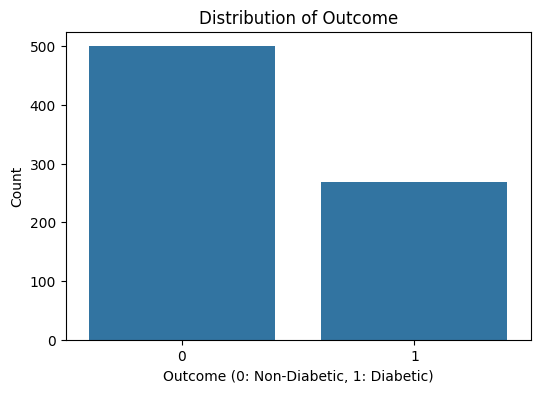

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=diabetes_dataset)
plt.title('Distribution of Outcome')
plt.xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Count')
plt.show()

# Data Collection and Analysis

## PIMA Diabetes Dataset

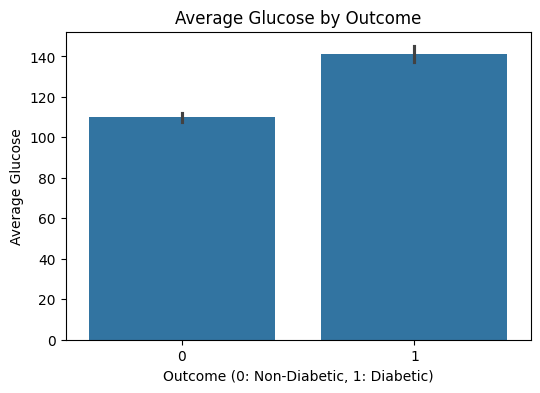

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Outcome', y='Glucose', data=diabetes_dataset)
plt.title('Average Glucose by Outcome')
plt.xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Average Glucose')
plt.show()

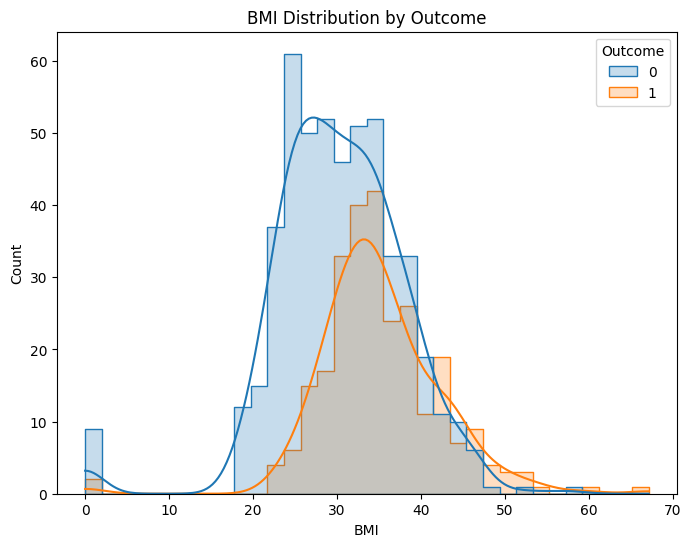

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=diabetes_dataset, x='', hue='Outcome', element='step', kde=True)
plt.title('BMI Distribution by Outcome')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0 --> Non-Diabetic

1 --> Diabetic

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


#Feature Selection:
Select relevant features that contribute most to the target outcome.

In [ ]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


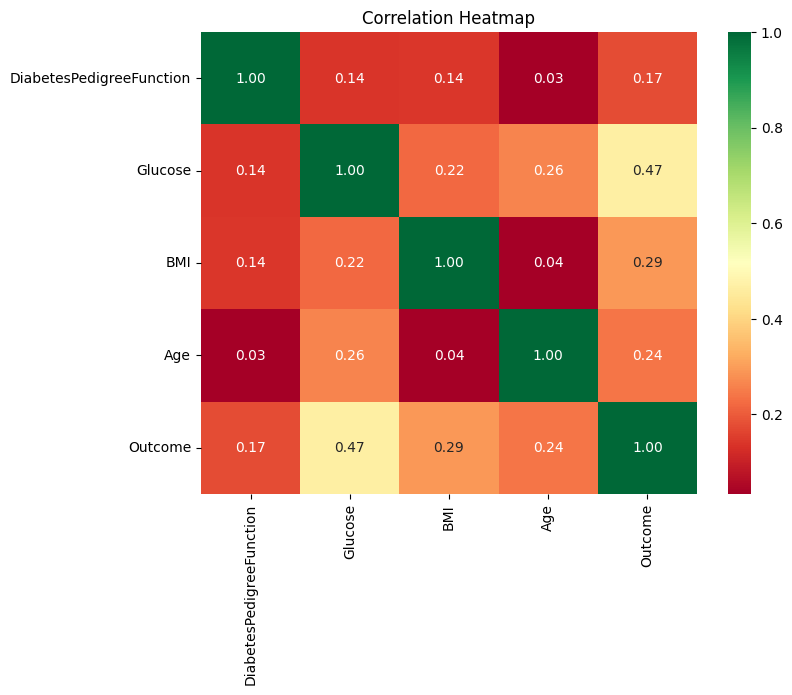

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ... (your previous code to create the correlation matrix)

# Create the heatmap with a different colormap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', fmt=".2f") # Changed cmap to 'viridis'
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
Y = diabetes_dataset['Outcome']
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


#Data Preprocessing:

Handle missing values.
Encode categorical variables.
Scale numerical features.
## Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_data

In [ ]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
Y = diabetes_dataset['Outcome']
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Data Splitting:
Split the data into training and testing sets.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


#Model Selection and Training:
Choose a classification algorithm and train the model using the training data

SVM: Finds an optimal hyperplane to separate data into classes. Effective in high-dimensional spaces, handles non-linear data.


In [ ]:
classifier = svm.SVC()

In [ ]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC()

#Evaluation
Evaluate the model on test data using metrics like accuracy, precision, recall, and F1-score.

## Accuracy Score
Accuracy: This measures the overall correctness of the model's prediction

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8289902280130294


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7272727272727273


# Making a Predictive System

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(




*   Precision: This focuses on the accuracy of positive predictions.
*   Recall (Sensitivity): This measures how well the model identifies actual positives.

*  F1-score: This metric balances precision and recall.





In [ ]:
# Import necessary libraries
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision, Recall, and F1-score
precision = precision_score(Y_test, X_test_prediction)
recall = recall_score(Y_test, X_test_prediction)
f1 = f1_score(Y_test, X_test_prediction)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 0.6666666666666666
Recall: 0.4444444444444444
F1-score: 0.5333333333333333


## Logistic Regression:

Predicts the probability of an instance belonging to a particular class (diabetic or non-diabetic).
Uses a logistic function to map the output to a probability between 0 and 1.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, Y_train)

# Make predictions on the test set
logreg_predictions = logreg_model.predict(X_test)

# Evaluate the model
logreg_accuracy = accuracy_score(Y_test, logreg_predictions)
print(f"Logistic Regression Accuracy: {logreg_accuracy}")

# Calculate precision, recall, and F1-score
logreg_precision = precision_score(Y_test, logreg_predictions)
logreg_recall = recall_score(Y_test, logreg_predictions)
logreg_f1 = f1_score(Y_test, logreg_predictions)

print(f"Logistic Regression Precision: {logreg_precision}")
print(f"Logistic Regression Recall: {logreg_recall}")
print(f"Logistic Regression F1-score: {logreg_f1}")

Logistic Regression Accuracy: 0.7597402597402597
Logistic Regression Precision: 0.717948717948718
Logistic Regression Recall: 0.5185185185185185
Logistic Regression F1-score: 0.6021505376344086


## Decision Tree:

Builds a tree-like structure to make decisions based on a series of features.
Easy to interpret and visualize.
Can be prone to overfitting if not pruned properly.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a Decision Tree model
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train, Y_train)

# Make predictions on the test set
dt_predictions = dt_model.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(Y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy}")

# Calculate other metrics (precision, recall, F1-score)
dt_precision = precision_score(Y_test, dt_predictions)
dt_recall = recall_score(Y_test, dt_predictions)
dt_f1 = f1_score(Y_test, dt_predictions)

print(f"Decision Tree Precision: {dt_precision}")
print(f"Decision Tree Recall: {dt_recall}")
print(f"Decision Tree F1-score: {dt_f1}")

Decision Tree Accuracy: 0.6948051948051948
Decision Tree Precision: 0.5897435897435898
Decision Tree Recall: 0.42592592592592593
Decision Tree F1-score: 0.4946236559139785


## Random Forest:

An ensemble method that combines multiple decision trees to improve prediction accuracy and reduce overfitting.
Generally more robust and accurate than individual decision trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Import necessary metrics

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, Y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(Y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

# Calculate other metrics (precision, recall, F1-score)
rf_precision = precision_score(Y_test, rf_predictions)  # Calculate and store precision
rf_recall = recall_score(Y_test, rf_predictions)        # Calculate and store recall
rf_f1 = f1_score(Y_test, rf_predictions)              # Calculate and store F1-score

print(f"Random Forest Precision: {rf_precision}")
print(f"Random Forest Recall: {rf_recall}")
print(f"Random Forest F1-score: {rf_f1}")

Random Forest Accuracy: 0.7207792207792207
Random Forest Precision: 0.6341463414634146
Random Forest Recall: 0.48148148148148145
Random Forest F1-score: 0.5473684210526316


## K-Nearest Neighbors (KNN):

Classifies an instance based on the majority class among its k-nearest neighbors in the feature space.
Simple to implement but can be computationally expensive for large datasets.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Import necessary metrics

# Create a KNN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, Y_train)

# Make predictions on the test set
knn_predictions = knn_model.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(Y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy}")

# Calculate other metrics (precision, recall, F1-score)
knn_precision = precision_score(Y_test, knn_predictions)  # Calculate and store precision
knn_recall = recall_score(Y_test, knn_predictions)        # Calculate and store recall
knn_f1 = f1_score(Y_test, knn_predictions)              # Calculate and store F1-score

print(f"KNN Precision: {knn_precision}")
print(f"KNN Recall: {knn_recall}")
print(f"KNN F1-score: {knn_f1}")

KNN Accuracy: 0.7207792207792207
KNN Precision: 0.6486486486486487
KNN Recall: 0.4444444444444444
KNN F1-score: 0.5274725274725275


## Display the evaluation matrix

                     Accuracy  Precision    Recall  F1-score
Model                                                       
SVM                  0.727273   0.717949  0.518519  0.533333
Logistic Regression  0.759740   0.717949  0.518519  0.602151
Decision Tree        0.694805   0.589744  0.425926  0.494624
Random Forest        0.720779   0.634146  0.481481  0.547368
KNN                  0.720779   0.648649  0.444444  0.527473


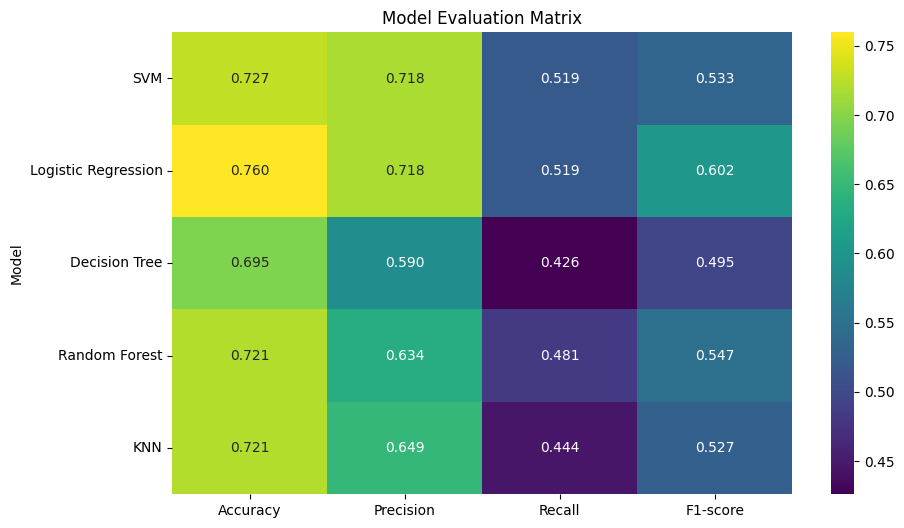

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary to store the evaluation metrics for each model
evaluation_metrics = {
    'Model': ['SVM', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN'],
    'Accuracy': [test_data_accuracy, logreg_accuracy, dt_accuracy, rf_accuracy, knn_accuracy],
    'Precision': [precision, logreg_precision, dt_precision, rf_precision, knn_precision],
    'Recall': [recall, logreg_recall, dt_recall, rf_recall, knn_recall],
    'F1-score': [f1, logreg_f1, dt_f1, rf_f1, knn_f1]
}

# Convert any potential nested lists to single numbers
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-score']:
    evaluation_metrics[metric] = [item if isinstance(item, (int, float)) else item[0] if isinstance(item, list) and len(item) > 0 else float('nan')
                                  for item in evaluation_metrics[metric]]

# Create a pandas DataFrame from the dictionary
evaluation_matrix = pd.DataFrame(evaluation_metrics)

# Set the 'Model' column as the index
evaluation_matrix.set_index('Model', inplace=True)

# Display the evaluation matrix
print(evaluation_matrix)

# Assuming 'evaluation_matrix' is your DataFrame
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.heatmap(evaluation_matrix, annot=True, cmap='viridis', fmt=".3f")
plt.title('Model Evaluation Matrix')
plt.show()

### Model Performance Comparison

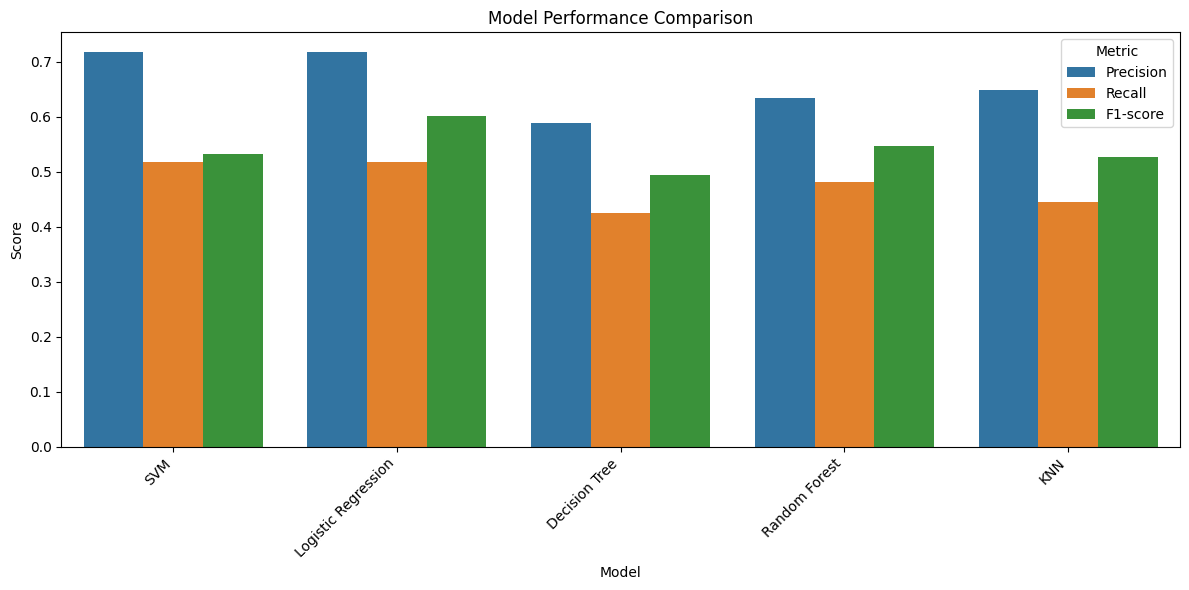

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary to store the evaluation metrics for each model
# Make sure all values in the lists are single numbers (not lists)
evaluation_metrics = {
    'Model': ['SVM', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN'],
    'Accuracy': [test_data_accuracy, logreg_accuracy, dt_accuracy, rf_accuracy, knn_accuracy],
    'Precision': [precision, logreg_precision, dt_precision, rf_precision, knn_precision],
    'Recall': [recall, logreg_recall, dt_recall, rf_recall, knn_recall],
    'F1-score': [f1, logreg_f1, dt_f1, rf_f1, knn_f1]
}

# Convert any potential nested lists to single numbers
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-score']:
    evaluation_metrics[metric] = [item if isinstance(item, (int, float)) else item[0] if isinstance(item, list) and len(item) > 0 else float('nan')
                                  for item in evaluation_metrics[metric]]

# Create a pandas DataFrame from the dictionary
evaluation_matrix = pd.DataFrame(evaluation_metrics)

# Melt the DataFrame to create a long-form structure for plotting
melted_df = pd.melt(evaluation_matrix.reset_index(), id_vars=['Model'],
                    value_vars=['Precision', 'Recall', 'F1-score'],
                    var_name='Metric', value_name='Score')

# Create the bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=melted_df)
plt.title('Model Performance Comparison')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Summary: Diabetes Prediction

* Goal: Predict diabetes in female Pima Indians using machine learning.

* Data: PIMA Indians Diabetes Database, including medical and demographic features.

* steps

1. Load and analyze data: Explore structure and statistics.
2. Preprocess data: Standardize features for better model performance.
3. Split data: Train and test sets for evaluation.
4. Train models: SVM, Logistic Regression, Decision Tree, Random Forest, KNN.
Evaluate models: Accuracy, precision, recall, F1-score.
5. Build predictive system: Use the best model (SVM) for prediction.
6. Compare models: Visualize and analyze performance metrics.

## Key Findings:

* Demonstrates various classification models for diabetes prediction.
* Highlights data preprocessing and evaluation.
Provides a basic framework for building predictive models.

In [ ]:
What is the target variable or the outcome we are trying to predict?

a) Age b) BMI c) Glucose d) Outcome

Answer: d) Outcome

# MCQS FROM DIABETES PREDICITION WITH MACHINE LEARNING
1. What is the target variable or the outcome we are trying to predict?
   a) Age b) BMI c) Glucose d) Outcome

   Answer : d) Outcome
2. What is the name of the dataset used in this analysis?
   a) Iris dataset b) Titanic dataset c) Pima Indians Diabetes Database d) MNIST dataset

  Answer: c) Pima Indians Diabetes Database
3. What is the meaning of 'Outcome' = 1 in the dataset?
   a) Non-Diabetic b) Diabetic c) Pre-diabetic d) Unknown

  Answer: b) Diabetic
4. What is the significance of the random_state parameter in train_test_split?
   a) It controls the shuffling of the data b) It ensures that the split is reproducible c) It specifies the size of the testing set d) It determines the type of model to be used

  Answer: b) It ensures that the split is reproducible
5. What does the classifier.fit(X_train, Y_train) line of code do?
  a) Makes predictions on the training data b) Evaluates the model's performance c) Trains the model using the training data and labels d) Creates a new SVM model

  Answer: c) Trains the model using the training data and labels
6. What is the purpose of the stratify=Y parameter in train_test_split?
  a) To ensure the training and testing sets have similar class distributions b) To shuffle the data before splitting c) To specify the size of the testing set d) To control the random number generator

  Answer: a) To ensure the training and testing sets have similar class distributions

7. What is the purpose of the X = diabetes_dataset.drop(columns = 'Outcome', axis=1) line of code?
  a) To remove the 'Outcome' column from the dataset and assign it to X b) To predict the 'Outcome' column c) To standardize the data d) To split the data into training and testing sets

  Answer: a) To remove the 'Outcome' column from the dataset and assign it to X
8. Which metric was primarily used to evaluate the performance of the models?
   a) Root Mean Squared Error (RMSE) b) R-squared c) Accuracy d) Area Under the Curve (AUC)

   Answer: c) Accuracy
9. What is the purpose of using StandardScaler in the code?
  a) To visualize the data distribution b) To handle missing values in the dataset c) To standardize the features by removing the mean and scaling to unit variance d) To split the data into training and testing sets

   Answer: c) To standardize the features by removing the mean and scaling to unit variance
10. What does the term "SVC" stand for in the code?
   a) Support Vector Classification b) Simple Value Calculation c) Standard Variable Conversion d) Supervised Vector Clustering

   Answer: a) Support Vector Classification
11. What does the term "accuracy" mean in the context of this analysis?

   a) How fast the model makes predictions b) How much memory the model uses c) How well the model predicts the correct outcome d) How complex the model is

   Answer: c) How well the model predicts the correct outcome